Note on Jupyter Notebook pdf <br>
The pdf for the notebook is not able to show the pdf embedded in the notebook using IFrame.  Extra screenshots will be included for showing the sections with pdf embedded, namely the sections for retweet network and mentions network.

Summary of functionality <br>
Fulfilled basic requirements:
- remove duplicated or inconsistent data
- refine data 
- have executable script "fixdata.py" for removal of unwanted data and refining data
- calculate the total number of tweets, retweets and replies in the dataset
- calculate the number of different users tweeting in this dataset
- calculate the average number of tweets, retweets and replies sent by a user
- identify most popular hashtags
- build plot showing the portion of each type of tweet in the dataset (tweets/retweets/replies)
- build plot for the timeline of the tweets activity in per day scale of the specified period
- build plot for the timeline of the tweets activity in per hour scale for the most active day
- build plot for the hashtags used with their number of usage
- build wordcloud for hashtags used in the tweets
- have executable script "generateGraphs.py" for regenerating images and save them in images subdirectory
- have script "testing.py" with unit tests for testing auiliary functions in scripts
<br> Easy additional requirements:
- analyse applications used to send tweets (with plot)
- calculate the average number of times each user being retweeted
- calculate the average number of times each user being replied
<br> Medium additional requirements:
- build graph for network that represents linkage between users who sent reply and those who were replied
- build graph for network that represents linkage between users who retweeted and those who were retweeted
- build graph for network that represents linkage between tweet sender and users who were mentioned by the sender
<br> Hard additional requirements:
- implement interactive visualisations, in means of showing timeline plot for different days and allow users to choose date
  of the shown timeline with buttons
  

Note on level of reproducibility and reusability <br>

The analysis of the program should be relatively easy to reproduce and reuse on other datasets if the the data is in a  very similar or the same format. The entities_str column being in JSON format is very important as the hashtag popularity analysis is done using the data and without it this section would not generate. The averages of replies, retweets and tweets should be easy to replicate if the dataset has the columns 'in_reply_to_user_id_str' and 'retweet_user_id_str'. The 'created_at' column is also needed for fixing the data to prevent records not within the timeframe from being included.
In summary, the most important requirement for reproducability is the format of the dataset itself as the program can clean-up wrong data and anaylse the data but not fix the format itself. 

A note on "generateGraphs.py": <br>
It was observed that running the script in different devices may produce varying graphs, specifically some of them graphs may be squeezed to be less readable or specific function may give rise to unexpected error.  The squeeze phenomenon appears for the graphs for showing the daily timeline, hashtags usage and especially the network graphs where the network graphs become totally unreadable.  As we are unable to pinpoint the cause of the squeeze, we decided to include an extra subdirectory "images_backup" to store the graphs in their expected form.  As for the unexpected errors, it seems that createApplicationChart(df) of generateGraphs runs normally for some devices but gives rise to errors in others which results in missing title and unexpected order of bars in the graph.  Similar situation also occurs for createXXXNetwork(df) of generateGraphs, except the error will cause the graph unable to be generated at all.  For this we suspect the source of error may be due to the use of an incompatible version of matplotlib and networkx.  So far the use of matplotlib of version 3.5.1 and networkx of version 2.6.3 seems to give the least error, so it is also recommended in README.txt to use this version for running the code.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib as pylab
import sys
from matplotlib.widgets import Button
from IPython.display import IFrame

In [23]:
sys.path.append('../code')

In [24]:
import generateGraphs as gg
import fixdata as fd

In [27]:
df = pd.read_csv("../data/CometLandingFixed.csv",
                 dtype={"id_str": str, "in_reply_to_user_id_str": str, "from_user_id_str": str,
                        "in_reply_to_status_id_str": str, "user_followers_count": "Int64",
                        "user_friends_count": "Int64", "geo_coordinates": str, "retweet_user_id_str": str}
                 , parse_dates=['created_at']
                 )

In [5]:
df

id_str        from_user  \
0      540930409279008768  amika0078788556   
1      540930042700656640   ChrisDMarshall   
2      540929998388211713         MHuuskoL   
3      540929346878599168  SaraGomezAranci   
4      540929229052203008          CBCDay6   
...                   ...              ...   
77302  532460149084930049     ABForScience   
77303  532460148451581952           atieyK   
77304  532460148254470144           j0nny5   
77305  532460148238090240          nsentse   
77306  532460147764125696          grery92   

                                                    text  \
0      RT @VersaTechnology: Congratulations @Philae20...   
1      CometWatch 2 December Â» Rosetta - ESA's comet...   
2      RT @EUCouncil: After the #CometLanding - Astro...   
3      RT @EUCouncil: After the #CometLanding - Astro...   
4      RT @shaunmajumder: Feels good to be the @CBCDa...   
...                                                  ...   
77302  This means  that the actual landing will be ar...   
77303  RT @ObservingSpace: Weâ€™ve been waiting 10 ye...   
77304  RT @maxplanckpress: Accomazzo (flight director...   
77305                   7 hours of waiting #CometLanding   
77306  RT @dsdanyds: TopTrendIT: TT ITALIA 09:59\r\n1...   

                     created_at geo_coordinates user_lang  \
0     2014-12-05 18:07:14+00:00             NaN        en   
1     2014-12-05 18:05:46+00:00             NaN        en   
2     2014-12-05 18:05:36+00:00             NaN        en   
3     2014-12-05 18:03:00+00:00             NaN        fr   
4     2014-12-05 18:02:32+00:00             NaN        en   
...                         ...             ...       ...   
77302 2014-11-12 09:09:26+00:00             NaN        en   
77303 2014-11-12 09:09:26+00:00             NaN        en   
77304 2014-11-12 09:09:26+00:00             NaN        en   
77305 2014-11-12 09:09:26+00:00             NaN        en   
77306 2014-11-12 09:09:26+00:00             NaN        it   

      in_reply_to_user_id_str in_reply_to_screen_name from_user_id_str  \
0                         NaN                     NaN       1297570116   
1                         NaN                     NaN         42201214   
2                         NaN                     NaN        574434762   
3                         NaN                     NaN       1057356487   
4                         NaN                     NaN        177276897   
...                       ...                     ...              ...   
77302                     NaN                     NaN       2333122519   
77303                     NaN                     NaN         58303715   
77304                     NaN                     NaN         17914863   
77305                     NaN                     NaN         20434005   
77306                     NaN                     NaN        487827577   

      in_reply_to_status_id_str  ...  \
0                           NaN  ...   
1                           NaN  ...   
2                           NaN  ...   
3                           NaN  ...   
4                           NaN  ...   
...                         ...  ...   
77302                       NaN  ...   
77303                       NaN  ...   
77304                       NaN  ...   
77305                       NaN  ...   
77306                       NaN  ...   

                                       profile_image_url user_followers_count  \
0      http://pbs.twimg.com/profile_images/3555068293...                  425   
1      http://pbs.twimg.com/profile_images/228087980/...                  347   
2      http://pbs.twimg.com/profile_images/4973510588...                  215   
3      http://pbs.twimg.com/profile_images/5391705804...                  741   
4      http://pbs.twimg.com/profile_images/4590694303...                 4331   
...                                                  ...                  ...   
77302  http://pbs.twimg.com/profile_images/4320695593...                  1

Data Cleaning: <br>
The duplicated records are first removed.  Then, records without any of the following essetial fields (ie. value = Nan) are also removed: id_str (Tweet ID), from_user_id_str (User ID), text (Tweet text), entities_str (information including hashtags used, users mentioned and used URL).  These fields are considered essential for analysing the dataset that we decide to remove records without any of these fields as they will not be usable for analysis.  The data are also filtered so that only tweets between 2014-11-12 and 2014-12-05 inclusively remain.  Additional filtering is also done to make sure all tweets in the dataset contain the hashtag "CometLanding" of any case as this should be the criteria of the tweets being in this dataset.

New Fields: <br>
New columns "specific_applications" and "applications" are added to store the application used for sending the tweet. "specific_applications" treated the same application for different devices as distinct applications (eg. Twitter for iPhone is different from Twitter for Android) while "applications" generalize them as the same application (eg. Twitter for iPhone and Twitter for Android are stored as Twitter).  There are also new columns added for information related to the user being retweeted: "retweet_user_id_str" (Retweeted User ID), "retweet_user_screen_name" (Retweeted User screen name), "retweet_user_name" (Retweeted User username).  The retweet-related columns are added to ease analysis specifically for retweets.

Removed Field: <br>
The field "time" is removed as it seems to duplicate with "created_at" but with less information.

Refine ID: <br>
"id_str" is refined with the "status_url".  Specifically, its value is replaced with the last 18 characters of "status_url".  This decision starts from the observation that the original values of "id_str" of 18 digits are not unique ie. there are some tweets that share the same ID, which should not be the case.  Then, it is observed that the URL in "status_url" always end with also 18 digits, and the first 15 digits are always the same as that of "id_str".  In addition to the fact the the last 3 digits of "id_str" are always zeroed, it is concluded that the original value of "id_str" are merely the 15 digits prefix of the actual Tweet ID with the last 3 zeroed, and that the one in "status_url" is the actual, full Tweet ID.  This conclusion is also supported by the fact that all values in "status_url" are unique.  Thus, the substitution is made for tweets with non-empty "status_url" field, or else "id_str" field remains the same.

In [30]:
total_replies = df[pd.notna(df["in_reply_to_user_id_str"])]  # replies
total_retweets = df[pd.notna(df['retweet_user_id_str'])] # retweets
retweet_reply = df.dropna(subset=['in_reply_to_user_id_str', 'retweet_user_id_str']) # replies that are also retweets
tweet_only = df[pd.isna(df["in_reply_to_user_id_str"]) & pd.isna(df['retweet_user_id_str'])]
reply_only = total_replies[pd.isna(total_replies['retweet_user_id_str'])]
retweet_only = total_retweets[pd.isna(total_retweets["in_reply_to_user_id_str"])]

In [31]:
print("Total number of tweets: " + str(len(df)))
print("Total number of replies: " + str(len(total_replies)))
print("Total number of retweets: " + str(len(total_retweets)))
print("Number of replies that are also retweets: " + str(len(retweet_reply)))
print("Number of replies that are not retweets: " + str(len(reply_only)))
print("Number of retweets that are not replies: " + str(len(retweet_only)))
print("Number of tweets that are neither reply nor retweet: " + str(len(tweet_only)))

Total number of tweets: 77307
Total number of replies: 1724
Total number of retweets: 59959
Number of replies that are also retweets: 30
Number of replies that are not retweets: 1694
Number of retweets that are not replies: 59929
Number of tweets that are neither reply nor retweet: 15654


In [32]:
from_users = set(df["from_user_id_str"]) # a set of unique 

In [33]:
print("Total no. of unique users: " + str(len(from_users)))

Total no. of unique users: 50216


In [34]:
print("Average retweets by a user: " + str(len(retweet_only) / len(from_users))) # excluding retweets that are replies
print("Average tweets by a user: " + str(len(tweet_only) / len(from_users))) # excluding retweets and replies
print("Average replies by a user: " + str(len(total_replies) / len(from_users)))

Average retweets by a user: 1.193424406563645
Average tweets by a user: 0.3117333120917636
Average replies by a user: 0.034331687111677556


In [35]:
# users receiving a reply
replied_users = set(total_replies["in_reply_to_user_id_str"]) 
# users that either have sent/replied/retweeted a tweet or received a reply
all_users_with_reply = from_users.union(replied_users) 
# users that both have sent/replied/retweeted a tweet and received a reply
from_users_with_reply = from_users.intersection(replied_users)
# get replies that are to users that have also tweeted/replied/retweeted
replies_to_from_users = total_replies[total_replies["in_reply_to_user_id_str"].isin(from_users)]

In [36]:
print("Average number of reply received by each user: " + str(len(total_replies) / len(all_users_with_reply)))
print("Average number of reply received by each replied user: " + str(len(total_replies) / len(replied_users)))
print("Average number of reply received by each user that has also tweeted/replied/retweeted: "
     + str(len(replies_to_from_users)/len(set(df["from_user_id_str"]))))
print("Number of users received reply: " + str(len(replied_users)))
print("Number of users who have tweeted/replied/retweeted and received a reply: " + str(len(from_users_with_reply)))
print("Number of users either send/reply/retweet or received a reply: " + str(len(all_users_with_reply)))
print("No. of replies where replied user has tweeted/retweeted/replied: " + str(len(replies_to_from_users)))

Average number of reply received by each user: 0.03408731414109459
Average number of reply received by each replied user: 2.1576971214017524
Average number of reply received by each user that has also tweeted/replied/retweeted: 0.026186872709893262
Number of users received reply: 799
Number of users who have tweeted/replied/retweeted and received a reply: 439
Number of users either send/reply/retweet or received a reply: 50576
No. of replies where replied user has tweeted/retweeted/replied: 1315


In [37]:
# users being retweeted
retweeted_user = set(total_retweets["retweet_user_id_str"])
# users that are either retweeted or have tweeted/retweeted/replied
all_users_with_rt = from_users.union(retweeted_user)
# users that both have sent/replied/retweeted a tweet and are retweeted
from_users_retweeted = from_users.intersection(retweeted_user)
# retweets where retweeted users have sent/replied/retweeted
retweets_from_users = total_retweets[total_retweets['retweet_user_id_str'].isin(from_users)]

In [38]:
print("Average no. each retweeted user being retweeted: " + str(len(total_retweets) / len(retweeted_user)))
print("Average no. each user being retweeted: " + str(len(total_retweets) / len(all_users_with_rt)))
print("Average no. each user that has tweeted/retweeted/replied being retweeted: " + 
     str(len(retweets_from_users) / len(from_users)))
print("Number of users retweeted: " + str(len(retweeted_user)))
print("Number of users that are tweeted and has tweeted/retweeted/replied: " + str(len(from_users_retweeted)))
print("Number of users that are either tweeted or have tweeted/retweeted/replied: " + str(len(all_users_with_rt)))
print("No. of retweets where retweeted user has tweeted/retweeted/replied: " + str(len(retweets_from_users)))

Average no. each retweeted user being retweeted: 12.449958471760798
Average no. each user being retweeted: 1.149983697424193
Average no. each user that has tweeted/retweeted/replied being retweeted: 1.002290106738888
Number of users retweeted: 4816
Number of users that are tweeted and has tweeted/retweeted/replied: 2893
Number of users that are either tweeted or have tweeted/retweeted/replied: 52139
No. of retweets where retweeted user has tweeted/retweeted/replied: 50331


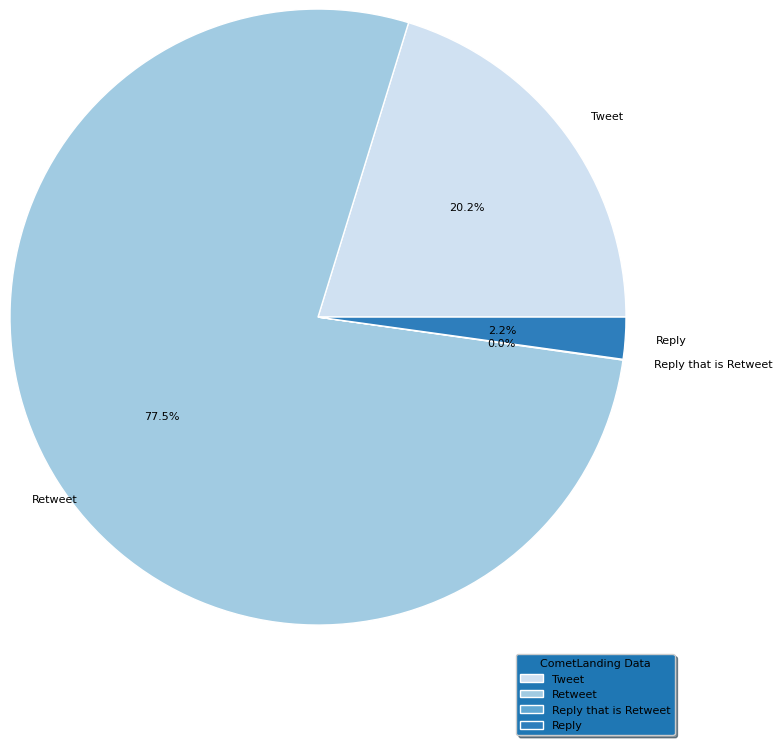

<Figure size 500x500 with 0 Axes>

In [39]:
gg.createTweetsTypeChart(df)
plt.show()
plt.clf()

As shown by the pie chart and the calculations above, most of the tweets in the dataset are retweet, followed by tweets that are neither reply nor retweet, and then replies. 

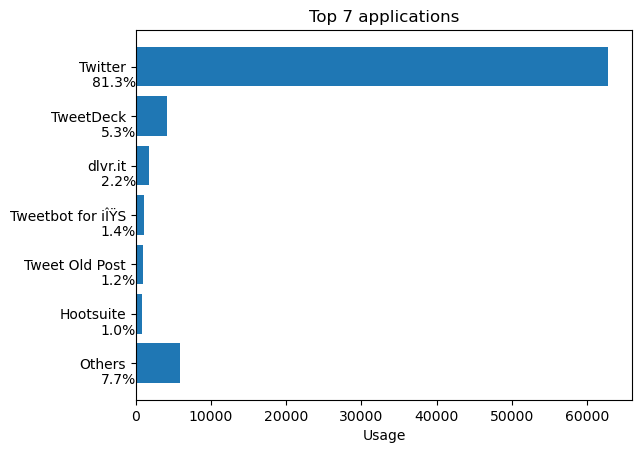

<Figure size 640x480 with 0 Axes>

In [40]:
gg.createApplicationChart(df)
plt.show()
plt.clf()

As observed from the bar chart, most of the users use Twitter to send the tweets. <br>
Note: depending on the version of matplotlib, the bar chart generated may be different from the one in images subdirectory, specifically the title may be missing and the bars may not be of descending order.

C:\Users\msmai\OneDrive\桌面\St Andrews\CS2006\Python\CS2006P\notebooks\../code\generateGraphs.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency'][index] += 1


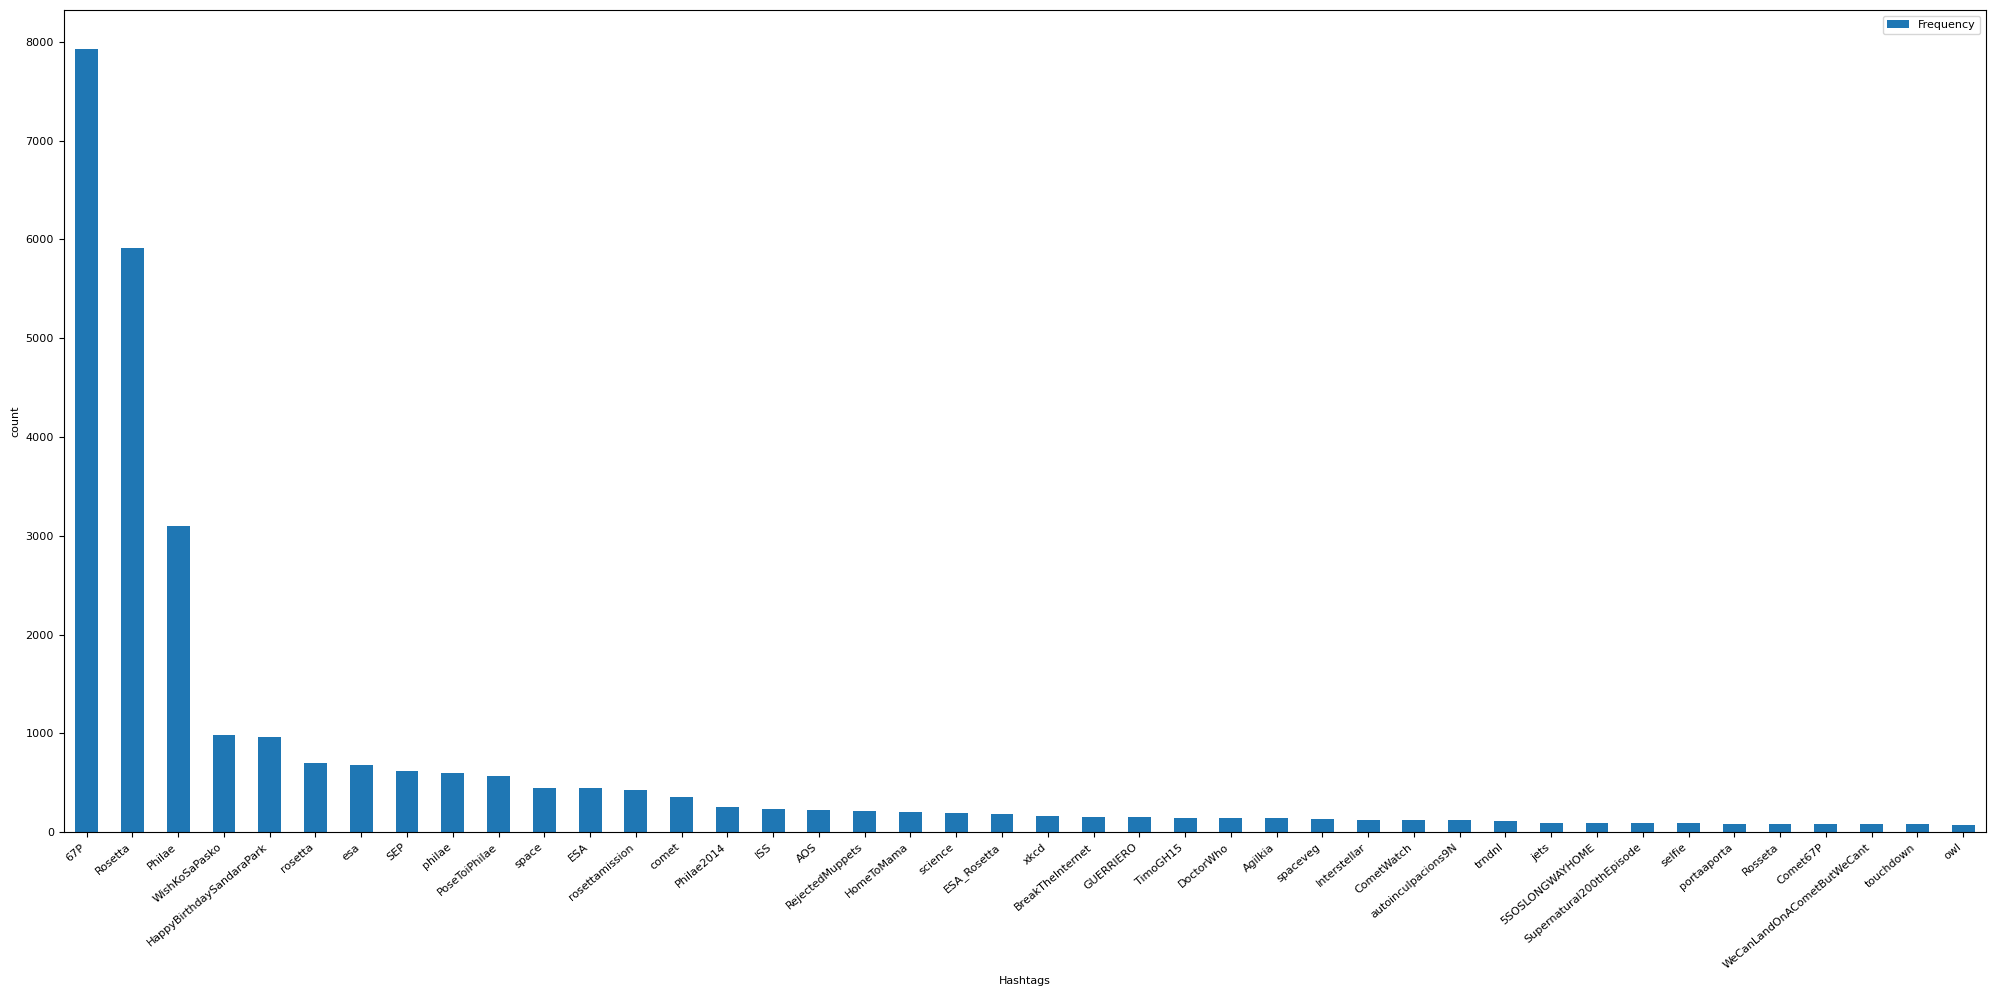

<Figure size 640x480 with 0 Axes>

In [41]:
gg.createHashtagChart("../data/CometLandingFixed.json")
plt.show()
plt.clf()

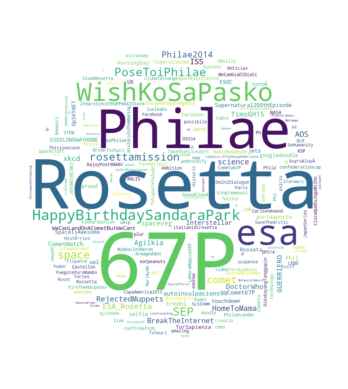

<Figure size 640x480 with 0 Axes>

In [42]:
gg.createWordCloud(gg.getListOfAllHashTags("../data/CometLandingFixed.json"))
plt.show()
plt.clf()

For the analysis of the most popular hashtags used, we decided to exclude "CometLanding" of any case as all tweets in the dataset should have this hashtag which will automatically make it the most popular hashtag.  As shown in the bar chart and the word cloud, the top 3 most popular hastags are "67P", "Rosetta" and "Philae".  The reason of popularity is likely due to the name of comet being 67P, Rosetta being the name of space probe orbitting around the comet for observation and Philae being the name of the lander module of Rosetta that landed on the comet. <br>
Note: the word cloud generated may have subtle difference each time, but the relative size of the hashtags should be the same.

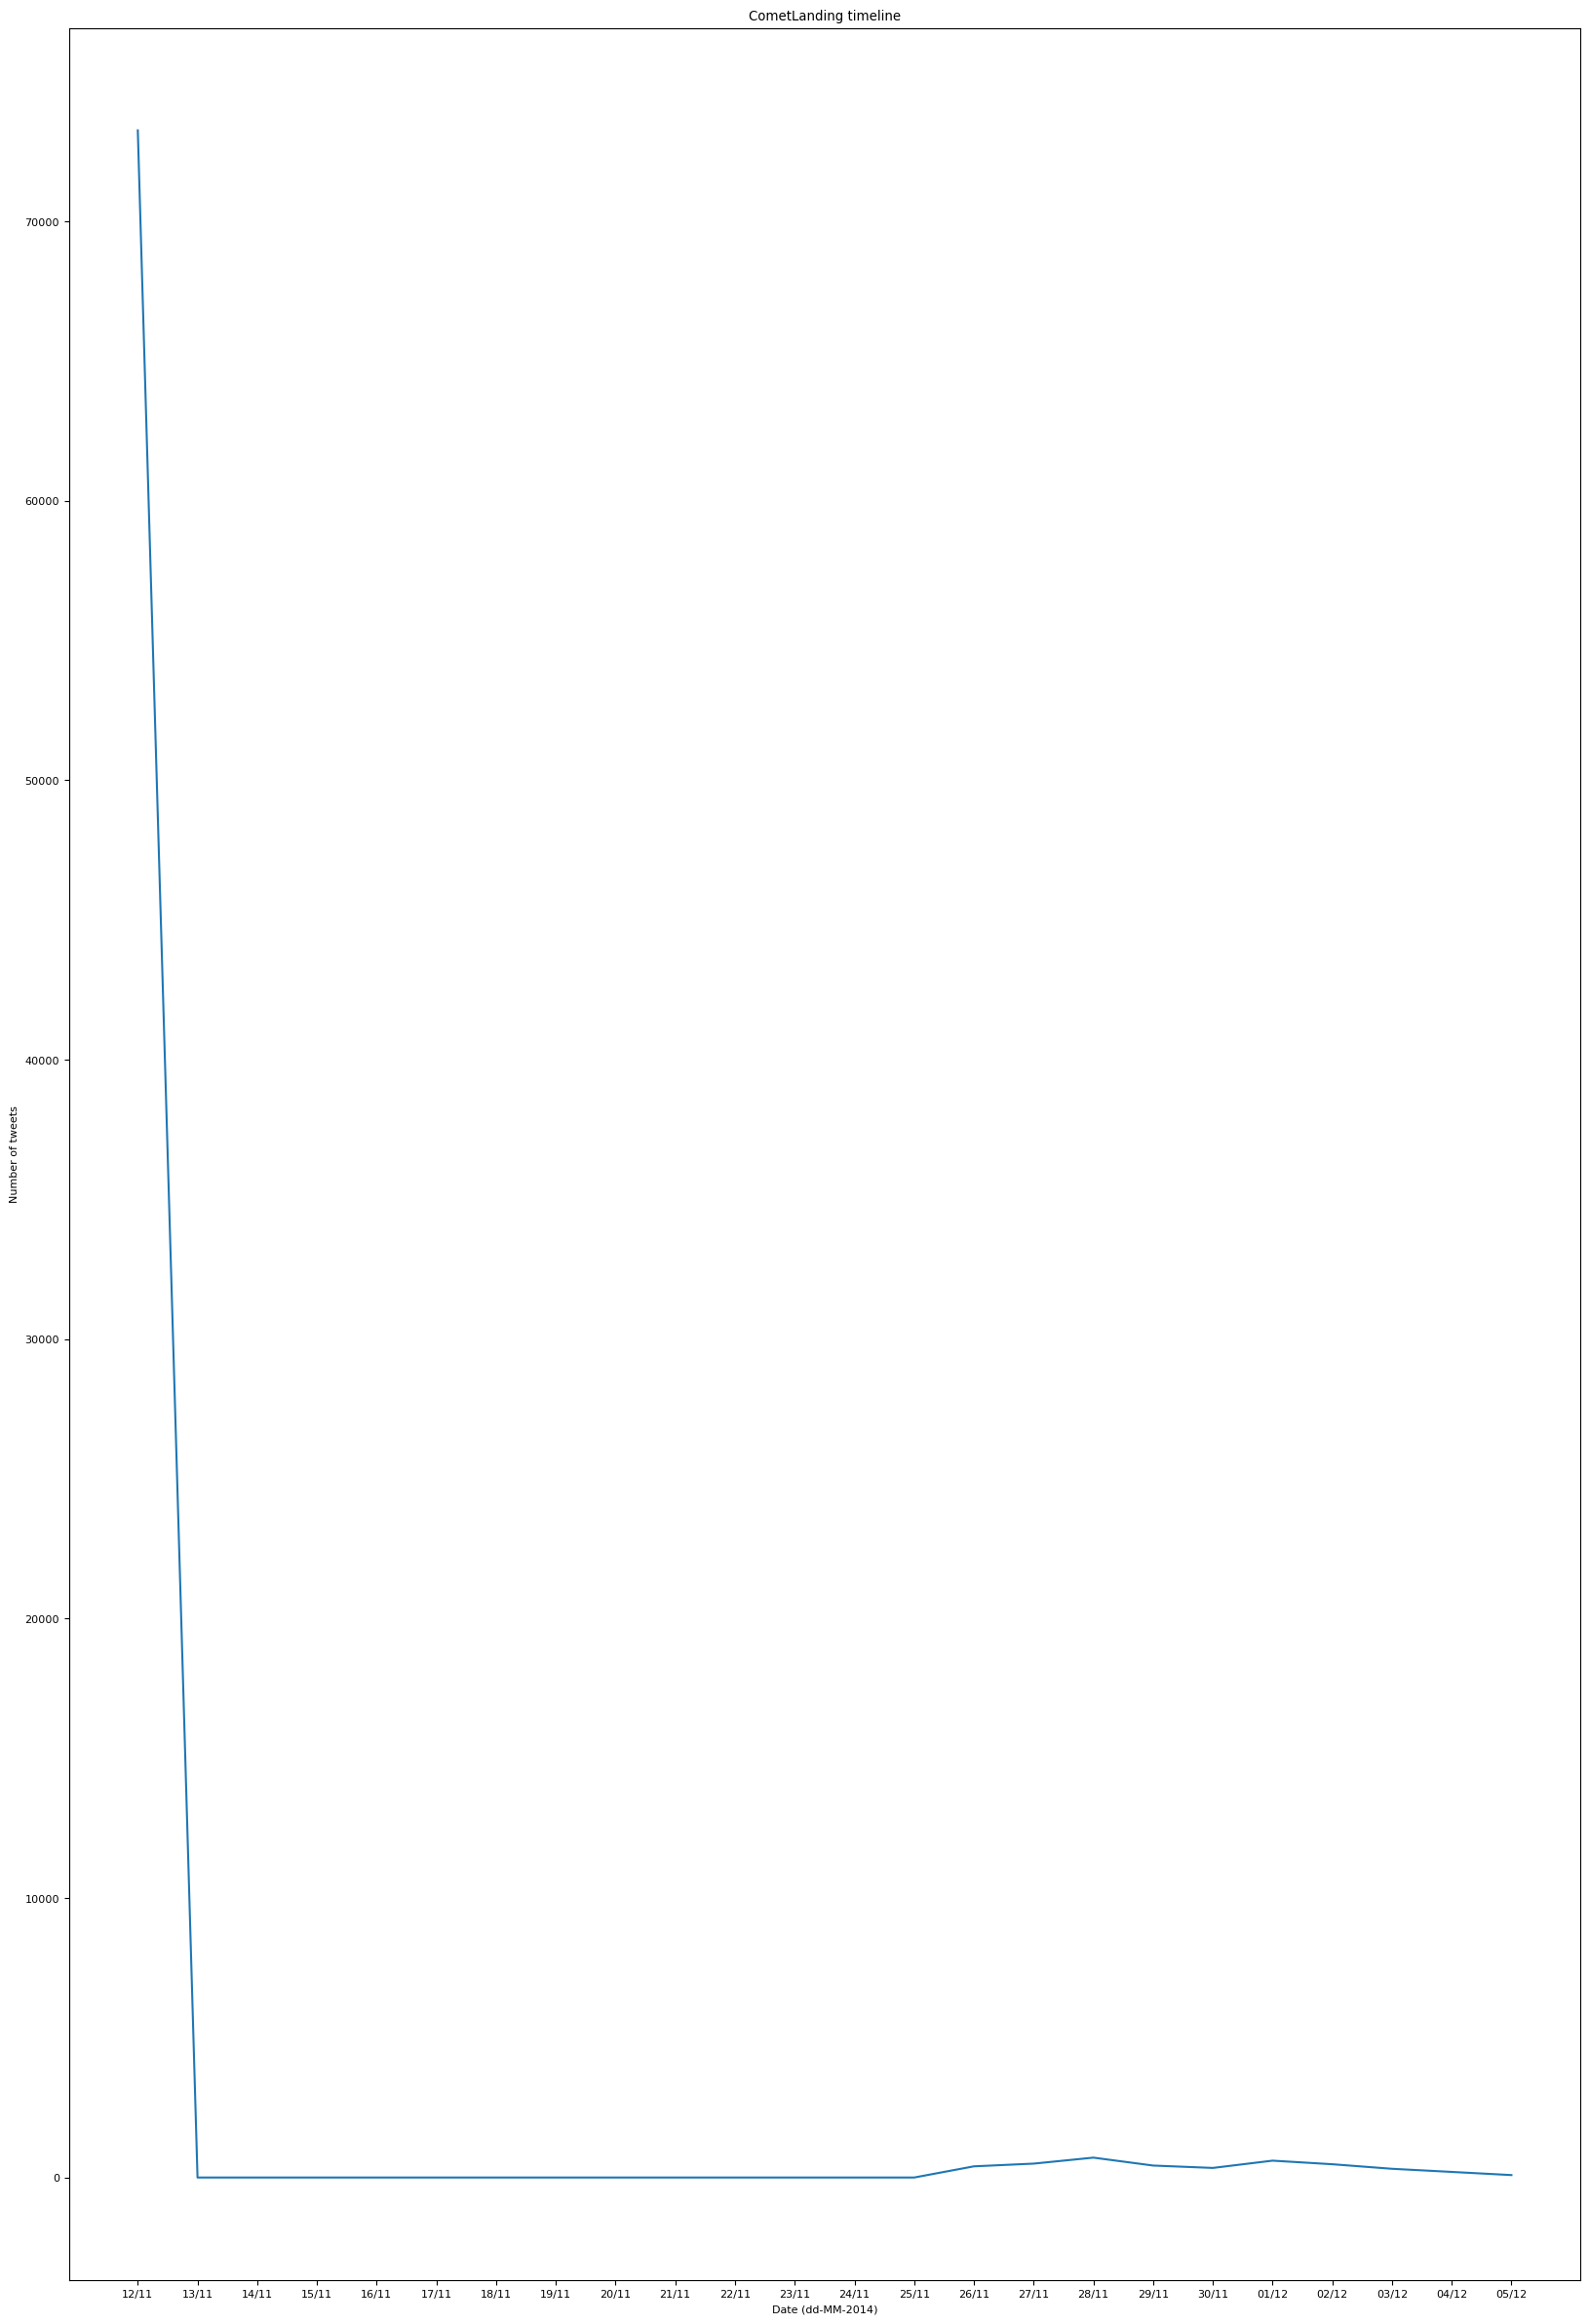

<Figure size 2000x3000 with 0 Axes>

In [43]:
gg.createDailyTimelinePlot(df)
plt.show()
plt.clf()

As observed from the timeline plot for each day during the observation period, the tweets are mainly sent on 12-11-2014, and after that day tweeting activity with the hashtag "CometLanding" is extremely low.  The reason of 12-11-2014 being the most active day is likely to be that the lander Philae was landed on the comet 67P on this day.  The low tweeting activity level beyond 12-11-2014 suggests that the popularity of this landing event does not last beyong the day of landing, that in the end the landing is not a topic of great concern for the general public.

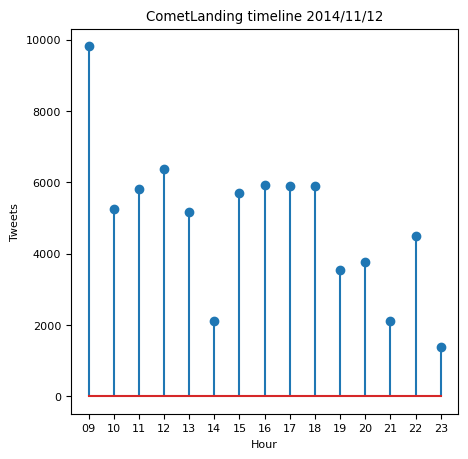

<Figure size 500x500 with 0 Axes>

In [44]:
gg.createActiveDayTimelinePlot(df)
plt.show()
plt.clf()

An additional graph is plotted to show the tweets timeline specifically on 12-11-2014, which is the day of comet landing and the date with most tweets sent with the hashtag "CometLanding" during the observation period.  Tweets started to be sent during 09:00 - 09:59 UTC, where this time period also has the most active tweeting activity.  Both observations may be explained by the fact that the lander Philae detached from the space probe at 08:35 UTC on the same day, where 09:00 - 09:59 UTC was around the time of the beginning of the landing process.

Network graphs analysis <br>
The network graphs show the interaction between different users: 
- Reply network show the linkage between reply senders and the users being replied
- Retweet network show the linkage between retweet senders and the users being retweeted
- Mentions network show the linkage between tweet senders and the users being mentioned <br>

Please refer to the images in "images" and "images_backup" subdirectory to examine the graphs in detail.  <br>
Note: The network graphs for retweet and mentions are loaded from the images in "images" subdirectory as each of them takes at least 50 minutes to generate.

In [45]:
# takes a few minutes to complete
fig = gg.plotNetworkGraph(gg.createReplyNetwork(df))
plt.show()
plt.close()
del fig

Reply Network (replies_network.pdf): <br>
Running the code above may generate one of the two following graphs, one with circles and one without.  The circles are believed to be representing self-pointing edge ie. edges that has the same node on both end.  Depending on the running device or the version of python/modules used the self-pointing edges may either be plotted visibly in forms of circles, or in a less visible manner which will result the graph without circles.  "replies_network.pdf" generated by the script "generateGraphs.py" in "images" subdirectory may be be in form of one of the graphs mentioned above, while the one in "images_backup" specifically stores the version with circles.  There is also a file "replies_network_nc.pdf" in "images_backup", which is the version without circles. <br>
As observed in the graphs, the two users that have replies-related interactions with the most users are "Philae2014" and "ESA_Rosetta".  From the screen names it is implied that both users are related to the comet landing mission in some way.  Perhaps they are the official accounts that send tweets about information related to the mission, which may be the reason of why they are involved with the most users in terms of replies. <br>
From "replies_network.pdf" in "images_backup", many circles can be observed, which implies that there are a significant amount of users that are retweeting themselves.

In [23]:
IFrame("../images/retweet_network.pdf", width=800, height=800)

Retweet Network (retweet_network.pdf): <br>
We failed to visualize the retweet network for analysis, as the graph generated is having much overlapping nodes and edges compressed together (perhaps due to the large amount of retweets) that it is not readable for analysis.  The nodes at the centre of the graph are surrounded by the highest density of edges in the graph, suggesting that those are the users who are involved with the most users through retweets.  The lack of circles in the graph show that there was no user retweeting themself.  However, further analysis was not possible due to the extremely low readability.

In [24]:
IFrame("../images/mentions_network.pdf", width=800, height=800)

Mentions Network (mentions_network.pdf): <br>
Similar to replies network, "mentions_network.pdf" generated by the script "generateGraphs.py" in "images" subdirectory  produced may be with or without circles depending on the running environment, with the circles being self-pointing edges.  "mentions_network.pdf" in "images_backup" subdirectory is the backup for version with circles, while "mentions_network_nc.pdf" is the one without circle. <br>
Same as retweet network, we failed to visualize the network for much analysis due to the heavy overlapping of nodes and edges and the subsequent low readibility. The presence of circles indicate that there were users who were mentioning themselves, and the isolated nodes that do not connect to the others represent users that did not mention anyone in their tweets.  Same as retweet network, the highly condensed part in the centre of the graphs are likely to be representing the users who are involved with the most users through mentions.  Judging from the circle-like edges in that area, it is likely that much of them were also mentioning themselves.  The outer blue ring in the graph mostly consists of disconnected nodes, where it can imply that there is also a considerable number of users who did not mention anyone in their tweets.  However, further analysis was not possible due to the extremely low readability.

In [9]:
%matplotlib

# guidance for implementing interactive buttons:
# https://matplotlib.org/3.5.1/gallery/widgets/buttons.html
# last accessed: 07/Apr/2022
# %matplotlib must be used, for interactive buttons won't work without it.
# Please don't spam next or back button in a fast pace or it will just freeze.
# Please run it 2 times, for the graph to appear

#data
day = df.set_index('created_at').groupby(pd.Grouper(freq='D')) # Group the day from 2014/12/11 - 2014/12/5
date_list_raw = [str(ts.strftime("%Y-%m-%d"))for ts in day.count()["id_str"].index.tolist()] #Formatting the date that was retrieved
date_list = [] # Dates with tweets
date_data_list = [] # 
date_label_list = [] #

for d in date_list_raw:
    date_raw = df[df['created_at'].apply(lambda x: True if re.search('^'+d, str(x)) else False)] # Grab specific data from specific date
    date = date_raw.set_index('created_at').groupby(pd.Grouper(freq='H'))
    date_labels = [str(ts.strftime("%H"))for ts in date.count()["id_str"].index.tolist()] # Get hours
    date_data = date.count()["id_str"].tolist()
    
    if(len(date_data) > 0 ):
        date_list.append(d) # append dates that contains tweets
        date_data_list.append(date_data)
        date_label_list.append(date_labels)



#graph
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
l, = plt.plot(date_label_list[0], date_data_list[0], lw=2)

class Index:
    
    def __init__(self):
        self.i = 0
        self.draw_graph()

    def next(self, event):
        self.i = (self.i + 1) % len(date_list) # to be able to press next buttom infinite times
        self.draw_graph()
  
        
            
    def prev(self, event):
        self.i -= 1
        if(self.i == -1):                    # to be able to press back buttom infinite times
            self.i= len(date_list)-1
        self.draw_graph()
    
    def draw_graph(self):
        
        plt.clf()
        plt.title("CometLanding timeline " + date_list[self.i])
        plt.xlabel("Hour")
        plt.ylabel("Tweets")
        plt.plot(date_label_list[self.i], date_data_list[self.i])
        plt.draw()
        
        
       
        axprev = plt.axes([0.7, 0.05, 0.1, 0.075])  #Button position
        axnext = plt.axes([0.81, 0.05, 0.1, 0.075]) #Button position
        self.bnext = Button(axnext, 'Next') 
        self.bnext.on_clicked(self.next)
        self.bprev = Button(axprev, 'Previous')
        self.bprev.on_clicked(self.prev)
        
        
        

Index()
plt.show()

Using matplotlib backend: QtAgg


Summary of provenance <br>
The followings are the code fragments referenced from other sources including lecture examples and the rest of the code are written by ourselves:
- use of regex for refining device-specific applications to device non-specific applications: <br>
  https://pynative.com/python-regex-capturing-groups/
- method for comparing timezone-aware date: <br>
  https://stackoverflow.com/questions/15307623/cant-compare-naive-and-aware-datetime-now-challenge-datetime-end <br>
  Posted by: Viren Rajput
- visualisation of network graph: <br>
  https://stackoverflow.com/questions/17381006/large-graph-visualization-with-python-and-networkx <br>
  Posted by: Vikram 
- method for iterating over a dataframe: <br>
  https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas <br>
  Posted by: waitingkuo
- method for importing modules of different directory: <br>
  https://www.geeksforgeeks.org/python-import-from-sibling-directory/ 
- guidance for plotting pie chart: <br>
  https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py <br>
  https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html <br>
  https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
- method for plotting bar chart: <br>
  https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
- method for converting date to string in specific format: <br>
  https://www.programiz.com/python-programming/datetime/strftime <br>
  https://www.tutorialspoint.com/python/time_strftime.htm 
- guidance for plotting line chart: <br>
  https://datatofish.com/line-chart-python-matplotlib/ 
- method for adjusting figure size: <br>
  https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib <br>
  Posted by: Jouni K. Seppannen
- guidance for implementing interactive buttons: <br>
  https://matplotlib.org/3.5.1/gallery/widgets/buttons.html
- grouping tweets with date: <br>
  https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
- reading from a JSON file for hashtags: <br>
  https://www.geeksforgeeks.org/read-json-file-using-python/ 
- learning how to create a wordcloud: <br>
  https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214
- unit tests guidance: <br>
  https://studres.cs.st-andrews.ac.uk/CS2006/Lectures/Python/W4-7_UnitTests/W4-7_UnitTests.pdf 
- method to show pdf image in notebook: <br>
  https://stackoverflow.com/questions/19470099/view-pdf-image-in-an-ipython-notebook <br>
  Posted by: Jakob